Loading IMDb Dataset for Sentiment Analysis


In [17]:
import tensorflow as tf
from keras.datasets import imdb

vocabulary_size=5000 ## Maximum number of unique words to be loaded
(train_review,train_label),(test_review,test_label)=imdb.load_data(num_words=vocabulary_size)
# Words that are more frequent in the dataset are retained, while less frequent words are discarded

Shapes of Training and Testing IMDb  Datasets:

In [18]:
print("Shape of Training review dataset:",train_review.shape)
print("Shape of Training review label:",train_label.shape)
print("Shape of Testing review dataset:",test_review.shape)
print("Shape of Testing review label:",test_label.shape)



print("------------Review-----------------")
print(train_review[0])
print("--------------Label---------------")
print(train_label[0])#(0 for negative, 1 for positive).

Shape of Training review dataset: (25000,)
Shape of Training review label: (25000,)
Shape of Testing review dataset: (25000,)
Shape of Testing review label: (25000,)
------------Review-----------------
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 2, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 1

Displaying IMDB Review in Words

In [19]:
word_to_id=imdb.get_word_index()# Get the word-to-index dictionary from IMDb dataset
id_to_word={i:word for word,i in word_to_id.items()}# Create a dictionary to map index to word for IMDb dataset

print("Original Review[First Review]")
for i in train_review[0]:
    print(id_to_word[i],end=" ")
print()
print([id_to_word.get(i," ")for i in train_review[0]])


Original Review[First Review]
the as you with out themselves powerful lets loves their becomes reaching had journalist of lot from anyone to have after out atmosphere never more room and it so heart shows to years of every never going and help moments or of every chest visual movie except her was several of enough more with is now current film as you of mine potentially unfortunately of you than him that with out themselves her get for was camp of you movie sometimes movie that with scary but and to story wonderful that in seeing in character to of 70s and with heart had shadows they of here that with her serious to have does when from why what have critics they is you that isn't one will very to as itself with other and in of seen over and for anyone of and br show's to whether from than out themselves history he name half some br of and odd was two most of mean for 1 any an boat she he should is thought and but of script you not while history he heart to real at and but when from one


Determining Max and Min Length of IMDb Reviews

In [20]:
print("Max Lenght of Review:",end=" ")
print(len(max(train_review+test_review,key=len)))
print("Min Lenght of Review:",end=" ")
print(len(min(train_review+test_review,key=len)))

Max Lenght of Review: 2697
Min Lenght of Review: 70


Padding IMDb Reviews to a Maximum Length

In [21]:
from keras.utils import pad_sequences

max_len=500
train_review=pad_sequences(train_review,maxlen=max_len)
test_review=pad_sequences(test_review,maxlen=max_len)


Building and Training an SimpleRNN Model for Sentiment Analysis

In [22]:
from keras.models import Sequential
from keras.layers import Embedding,Dense,SimpleRNN

embedding_size=32

model_s=Sequential()
model_s.add(Embedding(vocabulary_size,embedding_size,input_length=max_len))
model_s.add(SimpleRNN(100))
model_s.add(Dense(1,activation="sigmoid"))

model_s.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])
history_s=model_s.fit(train_review,train_label,validation_split=0.1,batch_size=25,epochs=3)
loss_s,accuracy_s=model_s.evaluate(test_review,test_label)

print("loss:",{loss_s})
print("accuracy:",{accuracy_s})

Epoch 1/3
900/900 [==============================] - 44s 47ms/step - loss: 0.6799 - accuracy: 0.5516 - val_loss: 0.6514 - val_accuracy: 0.6028
Epoch 2/3
900/900 [==============================] - 42s 47ms/step - loss: 0.6121 - accuracy: 0.6546 - val_loss: 0.6311 - val_accuracy: 0.6296
Epoch 3/3
782/782 [==============================] - 14s 18ms/step - loss: 0.6172 - accuracy: 0.6540
loss: {0.6172480583190918}
accuracy: {0.6539599895477295}



Building and Training an LSTM Model for Sentiment Analysis


In [23]:
from keras.layers import LSTM

embedding_size=32

model_l=Sequential()
model_l.add(Embedding(vocabulary_size,embedding_size,input_length=max_len))
model_l.add(SimpleRNN(100))
model_l.add(Dense(1,activation="sigmoid"))

model_l.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])
history_l=model_l.fit(train_review,train_label,validation_split=0.1,batch_size=25,epochs=3)
loss_l,accuracy_l=model_l.evaluate(test_review,test_label)

print("loss:",{loss_l})
print("accuracy:",{accuracy_l})

Epoch 1/3
900/900 [==============================] - 43s 47ms/step - loss: 0.6873 - accuracy: 0.5383 - val_loss: 0.6671 - val_accuracy: 0.5920
Epoch 2/3
900/900 [==============================] - 42s 46ms/step - loss: 0.6518 - accuracy: 0.6081 - val_loss: 0.6485 - val_accuracy: 0.5936
Epoch 3/3
782/782 [==============================] - 14s 17ms/step - loss: 0.6415 - accuracy: 0.6137
loss: {0.6415311098098755}
accuracy: {0.6137199997901917}



Building and Training an GRU Model for Sentiment Analysis

In [24]:
from keras.layers import GRU

embedding_size=32

model_g=Sequential()
model_g.add(Embedding(vocabulary_size,embedding_size,input_length=max_len))
model_g.add(SimpleRNN(100))
model_g.add(Dense(1,activation="sigmoid"))

model_g.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])
history_g=model_g.fit(train_review,train_label,validation_split=0.1,batch_size=25,epochs=3)
loss_g,accuracy_g=model_g.evaluate(test_review,test_label)

print("loss:",{loss_g})
print("accuracy:",{accuracy_g})

Epoch 1/3
900/900 [==============================] - 44s 48ms/step - loss: 0.6767 - accuracy: 0.5537 - val_loss: 0.6285 - val_accuracy: 0.6292
Epoch 2/3
900/900 [==============================] - 41s 45ms/step - loss: 0.5691 - accuracy: 0.7002 - val_loss: 0.5997 - val_accuracy: 0.6604
Epoch 3/3
782/782 [==============================] - 14s 17ms/step - loss: 0.6459 - accuracy: 0.5978
loss: {0.6458913087844849}
accuracy: {0.5978400111198425}


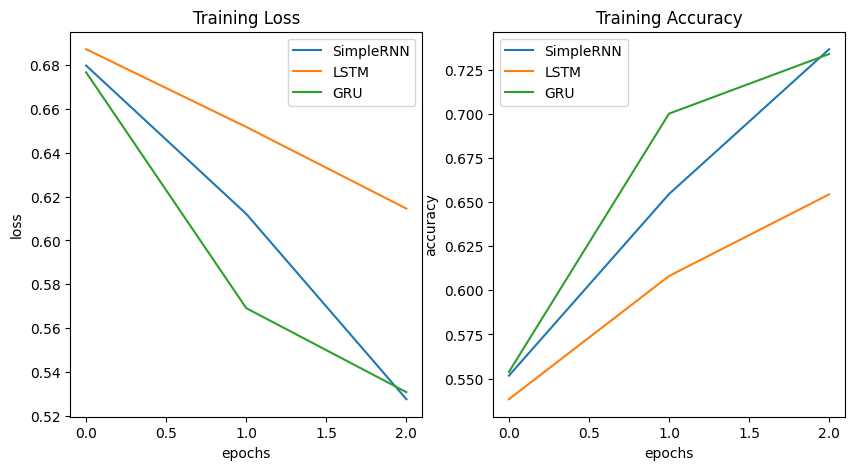

In [25]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(10,5))


plt.subplot(1,2,1)
plt.plot(history_s.history['loss'],label="SimpleRNN")
plt.plot(history_l.history['loss'],label="LSTM")
plt.plot(history_g.history['loss'],label="GRU")
plt.title('Training Loss')
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()


plt.subplot(1,2,2)
plt.plot(history_s.history['accuracy'],label="SimpleRNN")
plt.plot(history_l.history['accuracy'],label="LSTM")
plt.plot(history_g.history['accuracy'],label="GRU")

plt.title('Training Accuracy')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()

In [26]:
test_review[20]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

In [29]:
prediction_s=model_s.predict(test_review)
prediction_l=model_l.predict(test_review)
prediction_g=model_g.predict(test_review)


def predict(value):
    if value <0.5:
        a="Negative"
    else:
        a="Positive"
    return a



782/782 [==============================] - 13s 16ms/step


In [30]:



print("Actual Input:=",test_review[10])
print("Actual Output:               ",predict(test_label[20]))
print("Precidiction using SimpleRNN:",predict(prediction_s[20]))
print("Precidiction using LSTM:     ",predict(prediction_l[20]))
print("Precidiction using GRU:      ",predict(prediction_g[20]))

Actual Input:= [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0  